In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv('../dados/imdb-reviews-pt-br.csv')

In [4]:
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
SEED = 42

In [7]:
#X_train, X_test, y_train, y_test = train_test_split(df['text_pt'], df['sentiment'], random_state = SEED)
#model_LogisticRegression = LogisticRegression()
#model_LogisticRegression.fit(X_train, y_train)

In [8]:
print('Negativa \n')
print(df.text_pt[100])

Negativa 

Imagine cada clichê estereotipado e exagerado de todos os filmes e programas de TV nas ruas de Brooklyn entre 1930 e 1980. Preencha-o com um elenco de caricaturas intercambiáveis ​​em vez de personagens reais. Acrescente uma mistura de músicas de "período" e guitarras elétricas lamentáveis ​​durante as cenas "estrondosas". Em seguida, passe o tempo tentando descobrir ou importar qual dos Deuces vai ser morto no estrondo final anticlímax.Eu vou dar este filme aponta para não ser apenas mais uma comédia romântica, teen slasher, filme de ação explosivo, comédia de sexo adolescente, infantil musical, ou veículo de indicação ao Oscar. Mas trazer algo novo ou interessante para o gênero da tragédia das gangues de rua pode ter sido bom.


In [9]:
print('Positiva \n')
print(df.text_pt[40002])

Positiva 

Parece que deveria ser uma biografia de Claude Monet, mas na verdade é uma história altamente focada de relacionamentos entre três garotas adolescentes em uma equipe francesa de nado sincronizado. Não há pais ou professores para falar, nenhuma escola, e meninos são representados por uma figura periférica, o huno François, que entra na história determinado de tempos em tempos e sempre deixa confuso. Paul Aquart é o mais novo dos três, apenas aspirante. para se juntar ao time que ela tanto admira. Ela está parecendo estranha. Ela ainda não saiu do seu crescimento adolescente e tem membros longos e magros, pés grandes e nada de que falar. Ela é prognata e ostenta esses lábios gordos e franzidos. Depois de um tempo, sua aparência cresce em você e, de certos ângulos, ela pode parecer cativante. Adele Haenel é mais velha - mais, mais desenvolvida fisicamente. Que figura glamourosa ela corta seu traje de banho, passeando, provocando os garotos, balançando os longos cabelos loiros. 

In [10]:
df.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [11]:
df.sentiment = df.sentiment.replace({'neg':0, 'pos':1})
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0


Corpus textual é o conjunto de dados de todos os textos

# Criação de vocabulário

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vectorizer = CountVectorizer(lowercase=False)
bag_of_words = vectorizer.fit_transform(texto)


vectorizer.get_feature_names_out()
vector_texto = pd.DataFrame(bag_of_words.toarray(), columns = vectorizer.get_feature_names_out())
vector_texto

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [14]:
vectorizer = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorizer.fit_transform(df.text_pt)
vector_texto = pd.DataFrame(bag_of_words.toarray(), columns = vectorizer.get_feature_names_out())
vector_texto

,Eu,ao,apenas,as,com,como,da,de,do,dos,...,seu,sobre,sua,são,também,tem,tão,um,uma,você
0,0,1,0,0,2,1,0,4,4,2,...,1,1,0,0,0,1,0,3,2,0
1,0,0,0,0,2,0,0,7,1,2,...,1,0,0,2,0,1,0,4,2,1
2,1,0,0,0,3,1,0,10,2,0,...,0,0,0,3,1,0,1,3,2,2
3,2,0,1,4,7,2,1,13,3,1,...,0,0,0,1,0,1,0,7,4,1
4,0,0,1,2,3,0,1,16,2,1,...,0,0,0,4,0,0,0,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0,2,0,0,0,1,1,5,1,0,...,0,0,1,0,0,0,0,2,1,0
49455,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,1,0
49456,1,0,0,1,3,8,1,14,8,4,...,1,0,1,4,0,1,1,12,3,2
49457,1,0,0,2,2,1,1,5,1,2,...,0,0,0,0,3,0,0,4,1,2


LogisticRegression()

In [16]:
model_LogisticRegression.score(X_test, y_test)

0.6583097452486858

In [38]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    


    vectorizer = CountVectorizer(lowercase=False, max_features=50)
    
    bag_of_words = vectorizer.fit_transform(texto[coluna_texto])
    
    vector_texto = pd.DataFrame(bag_of_words.toarray(), columns = vectorizer.get_feature_names_out())
    
    X_train, X_test, y_train, y_test = train_test_split(vector_texto, texto[coluna_classificacao], random_state = SEED)
    model_LogisticRegression = LogisticRegression()
    model_LogisticRegression.fit(X_train, y_train)   
    return model_LogisticRegression.score(X_test, y_test)

In [18]:
classificar_texto(df, 'text_pt', 'sentiment')

0.6583097452486858

# Criação de WordCloud geral

In [19]:
%matplotlib inline

from wordcloud import WordCloud

In [20]:
all_words = ' '.join([text for text in df.text_pt])
word_cloud = WordCloud().generate(all_words)

In [21]:
import matplotlib.pyplot as plt

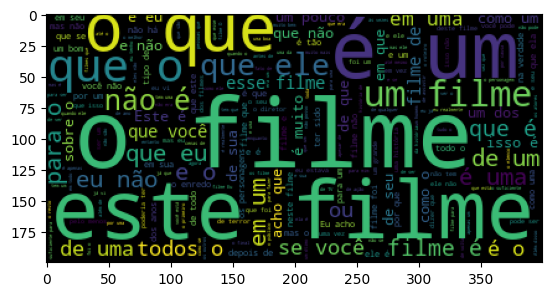

In [22]:
plt.figure()
plt.imshow(word_cloud)
plt.show()

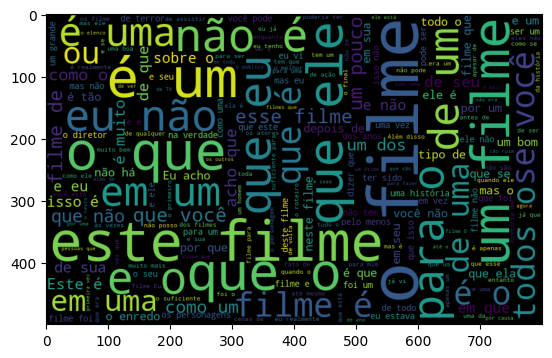

In [23]:
word_cloud = WordCloud(width=800, height=500,
                       max_font_size=110).generate(all_words)

plt.figure()
plt.imshow(word_cloud)
plt.show()

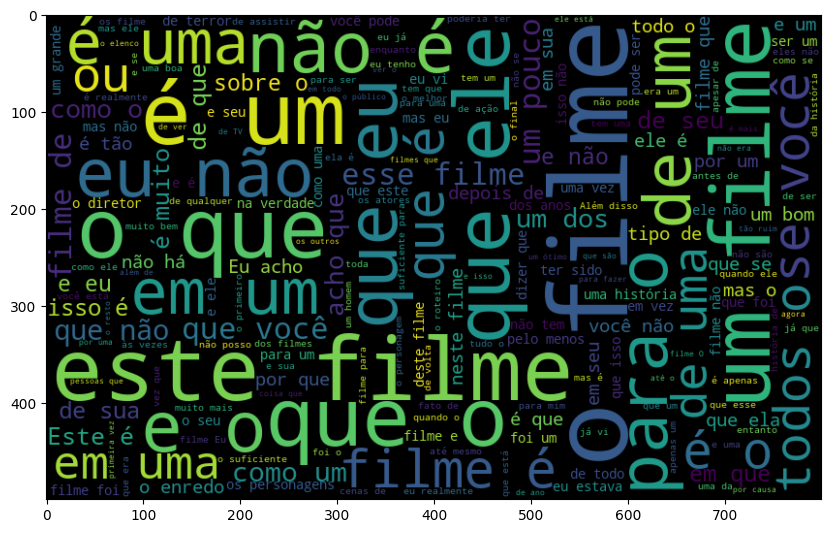

In [24]:
plt.figure(figsize=(10, 7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()

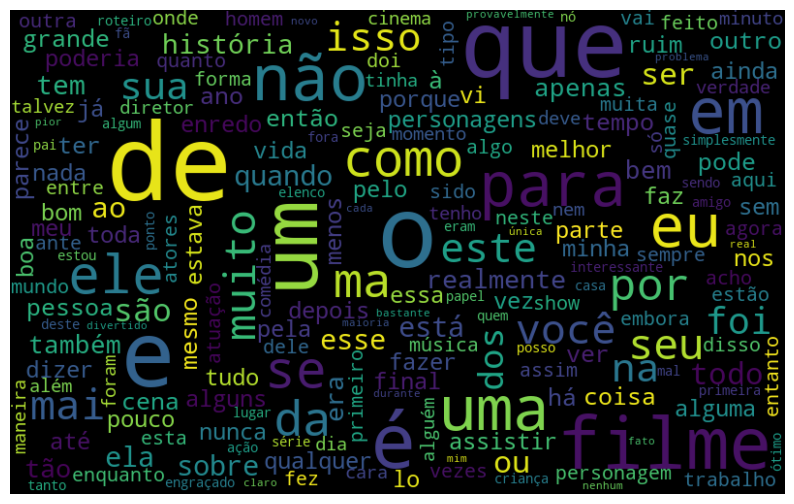

In [25]:
word_cloud = WordCloud(width=800, height=500,
                       max_font_size=110, 
                       collocations=False).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Criação de WordCloud positiva

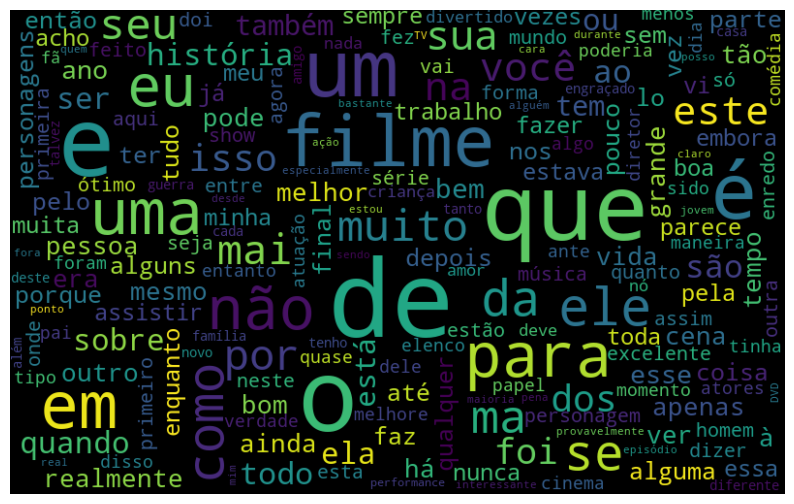

In [26]:
all_words_positive = ' '.join([text for text in df.loc[df.sentiment == 1].text_pt])


word_cloud = WordCloud(width=800, height=500,
                       max_font_size=110, 
                       collocations=False).generate(all_words_positive)

plt.figure(figsize=(10, 7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Criação de WordCloud negativa

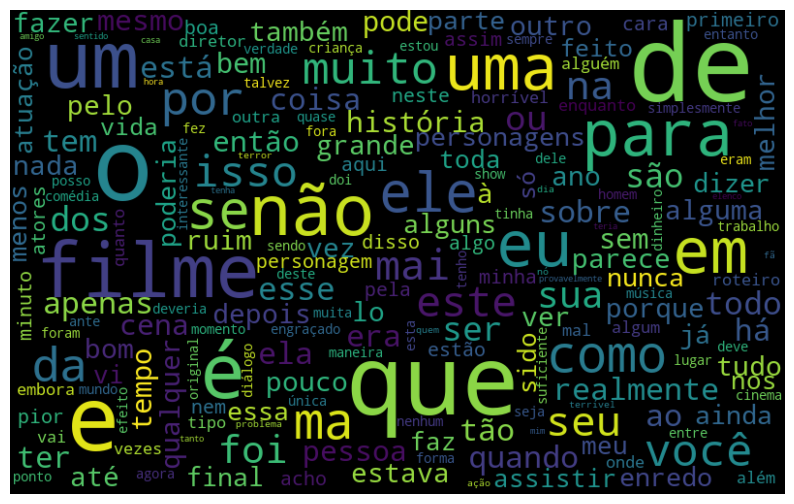

In [27]:
all_words_negative = ' '.join([text for text in df.loc[df.sentiment == 0].text_pt])


word_cloud = WordCloud(width=800, height=500,
                       max_font_size=110, 
                       collocations=False).generate(all_words_negative)

plt.figure(figsize=(10, 7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [28]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Tokenização

In [29]:
from nltk import tokenize

In [30]:
token = tokenize.WhitespaceTokenizer()
tokenized_words = token.tokenize(all_words)
freq = nltk.FreqDist(tokenized_words)
df_freq = pd.DataFrame({'word':freq.keys(), 
                        'freq':freq.values()})
df_freq

,word,freq
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


In [31]:
df_freq.nlargest(columns='freq',n=10)

,word,freq
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


# Gráfico de Paretto

In [32]:
import seaborn as sns

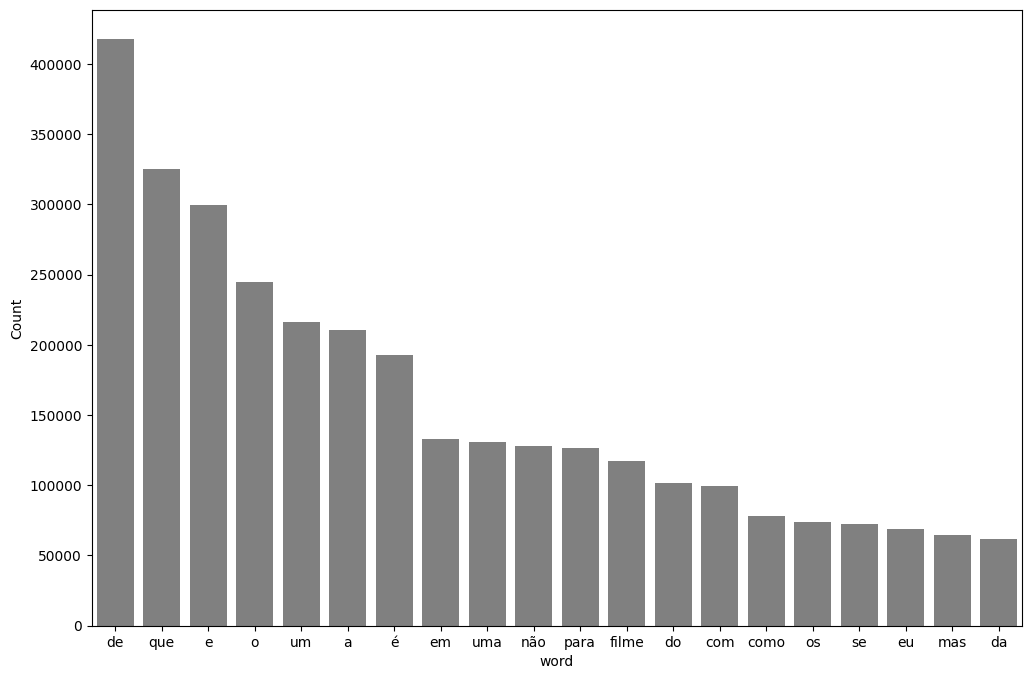

In [33]:
plt.figure(figsize=(12,8))
ax = sns.barplot(df_freq.nlargest(columns='freq',n=20), x ='word',y='freq', color = 'gray')
ax.set(ylabel = 'Count')
plt.show()


In [61]:
def pareto(df, column_analise):
    all_words = ' '.join([text for text in df[column_analise]])
    
    token = tokenize.WhitespaceTokenizer()
    tokenized_words = token.tokenize(all_words)
    
    freq = nltk.FreqDist(tokenized_words)
    df_freq = pd.DataFrame({'word':freq.keys(), 
                            'freq':freq.values()})
    
    plt.figure(figsize=(12,8))
    ax = sns.barplot(df_freq.nlargest(columns='freq',n=10), x ='word',y='freq', color = 'gray')
    ax.set(ylabel = 'Count')
    plt.show()

# Stopwords

In [34]:
stop_words = nltk.corpus.stopwords.words('portuguese')

In [36]:
processed_words = []

for opniao in df.text_pt:
    nova_frase = list()
    text_words = token.tokenize(opniao)
    for word in text_words:
        if word not in stop_words:
            nova_frase.append(word)
    processed_words.append(' '.join(nova_frase))

df['tratment_1'] = processed_words
df

,id,text_en,text_pt,sentiment,tratment_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve..."
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",1,"Como média votos baixa, fato funcionário locad..."
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,1,O enredo algumas reviravoltas infelizes inacre...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,1,Estou espantado forma filme maioria outros méd...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,1,A Christmas Together realmente veio antes temp...


In [39]:
classificar_texto(df, 'tratment_1', 'sentiment')

0.6811160533764659

In [46]:
from string import punctuation

In [47]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

In [49]:
stop_word_ponctuation = pontuacao + stop_words

In [54]:
print(stop_word_ponctuation)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', 'a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'h

In [56]:
token_ponctuation = tokenize.WordPunctTokenizer()

In [ ]:
processed_words = list()

for opniao in df.tratment_1:
    nova_frase = list()
    text_words = token_ponctuation.tokenize(opniao)
    for word in text_words:
        if word not in stop_word_ponctuation:
            nova_frase.append(word)
    processed_words.append(' '.join(nova_frase))

processed_words

In [58]:
df['tratment_2'] = processed_words
df.head(10)

,id,text_en,text_pt,sentiment,tratment_1,tratment_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...
5,6,"A funny thing happened to me while watching ""M...",Uma coisa engraçada aconteceu comigo enquanto ...,0,Uma coisa engraçada aconteceu comigo enquanto ...,Uma coisa engraçada aconteceu comigo enquanto ...
6,7,This German horror film has to be one of the w...,Este filme de terror alemão tem que ser um dos...,0,Este filme terror alemão estranhos vi. Eu cien...,Este filme terror alemão estranhos vi Eu cient...
7,8,"Being a long-time fan of Japanese film, I expe...","Sendo um fã de longa data do cinema japonês, e...",0,"Sendo fã longa data cinema japonês, esperava i...",Sendo fã longa data cinema japonês esperava Eu...
8,9,"""Tokyo Eyes"" tells of a 17 year old Japanese g...","""Tokyo Eyes"" fala de uma menina japonesa de 17...",0,"""Tokyo Eyes"" fala menina japonesa 17 anos cai ...",Tokyo Eyes fala menina japonesa 17 anos cai ho...
9,10,Wealthy horse ranchers in Buenos Aires have a ...,Fazendeiros ricos em Buenos Aires têm uma long...,0,Fazendeiros ricos Buenos Aires têm longa polít...,Fazendeiros ricos Buenos Aires têm longa polít...


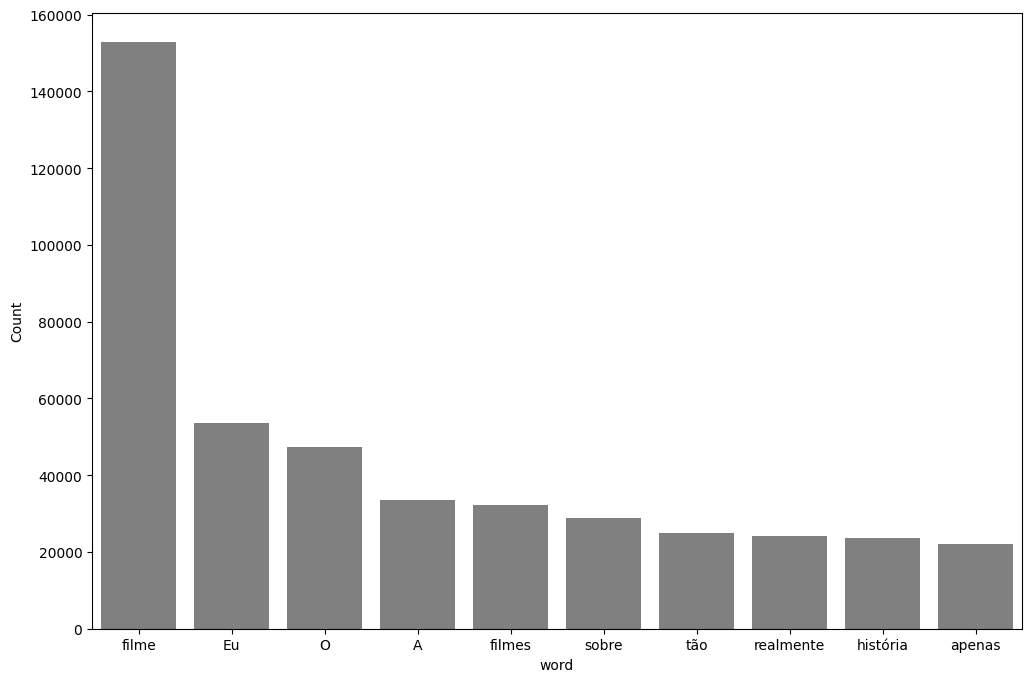

In [62]:
pareto(df, 'tratment_2')

In [64]:
import unidecode

In [65]:
acentos = 'é, á, ó'

teste = unidecode.unidecode('é, á, ó')
teste

'e, a, o'

In [67]:
sem_acentos = [unidecode.unidecode(text) for text in df['tratment_2']]

In [68]:
df['tratment_3'] =sem_acentos

processed_words = []

for opniao in df.tratment_3:
    nova_frase = list()
    text_words = token.tokenize(opniao)
    for word in text_words:
        if word not in stop_words:
            nova_frase.append(word)
    processed_words.append(' '.join(nova_frase))

df['tratment_3'] = processed_words
df.head()

,id,text_en,text_pt,sentiment,tratment_1,tratment_2,tratment_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...,Filmes fotos latao palavra apropriada verdade ...


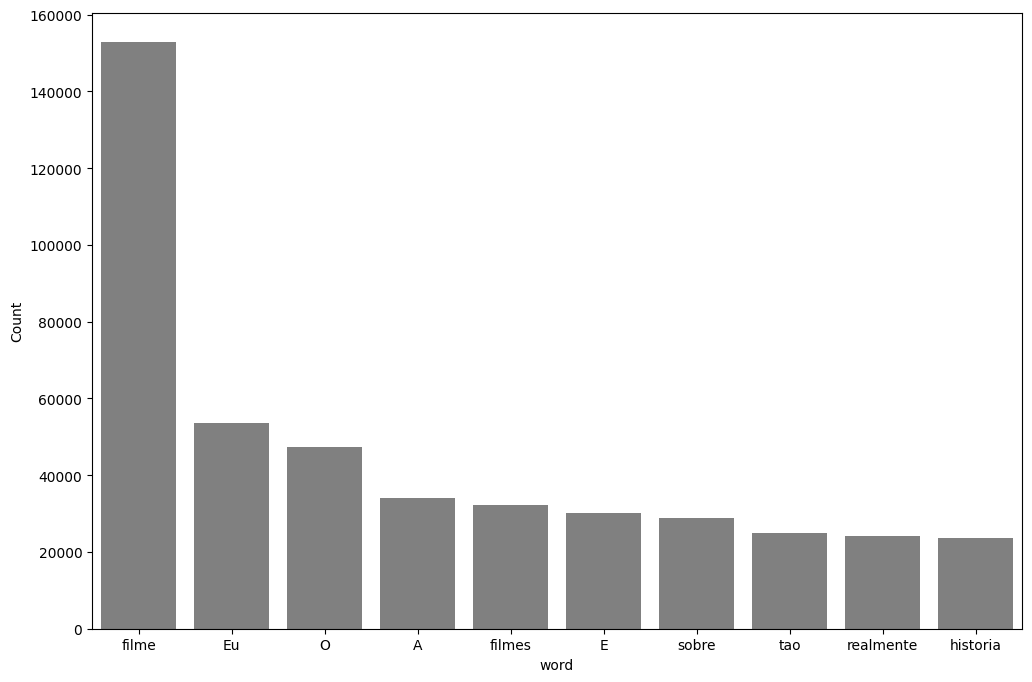

In [69]:
pareto(df, 'tratment_3')